In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.feature_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\mohammad.jakaria\biden.csv')
df.head(n=15)
df.describe()

,biden,female,age,educ,dem,rep
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,62.163807,0.552850,47.535141,13.360266,0.431655,0.205313
std,23.462034,0.497337,16.887444,2.440257,0.495444,0.404042
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,34.000000,12.000000,0.000000,0.000000
50%,60.000000,1.000000,47.000000,13.000000,0.000000,0.000000
75%,85.000000,1.000000,59.500000,16.000000,1.000000,0.000000
max,100.000000,1.000000,93.000000,17.000000,1.000000,1.000000


# Task 1

# Split the data set into a training set and a test set

In [3]:
y = df['biden'].values
X = df[['female', 'age', 'educ', 'dem', 'rep']].values
X_covariates = ['female', 'age', 'educ', 'dem', 'rep']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,train_size=0.70, test_size = 0.3, random_state=25)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:  [[ 1 54 11  1  0]
 [ 1 35 12  0  0]
 [ 1 43 12  0  0]
 ...
 [ 0 30 14  0  0]
 [ 1 73 12  0  0]
 [ 1 50 12  1  0]]
y_train:  [100  60  85 ...  50  70  75]
X_test:  [[ 1 21 12  0  0]
 [ 1 61 12  1  0]
 [ 1 61 14  1  0]
 ...
 [ 1 81 13  0  0]
 [ 1 62 13  1  0]
 [ 0 18  9  0  1]]
y_test:  [ 50  85  85  60  30  70  85  40  70  70  85  70  60  85  70  50  70  70
  60  70  50  50  60  40 100  50  50  70  40  70  85  80  50 100  60  50
  85  60  40  70  50  50  75  85  50  50  60  15  40  60  50  70  70  15
  70  85 100  80  50  60  50 100  70  50  50  50  50  70  70  85  60   0
  60  50  60  50   0   0  50  85  40  70   0  70  50  50  70  30  60  50
  50  85  85  60  85  50 100  50  85  60  85  80  30  60  90  30  50  60
  85 100  50  60  70  85 100  15 100  40  60  85  60  35  60  85  50  50
  85  50  70 100  85  30  70  85  85  70  40  15  60  40  30  50  70  70
  85  60  50   0   0  50  30  60  70  85  50  60  50  40  50  30  60 100
  40  50  85  60  70  60  85  30  60  85  50   

# Plot the tree

[Text(465.0, 792.75, 'dem <= 0.5\nmse = 556.262\nsamples = 1264\nvalue = 62.165'),
 Text(232.5, 566.25, 'rep <= 0.5\nmse = 507.397\nsamples = 724\nvalue = 52.811'),
 Text(116.25, 339.75, 'female <= 0.5\nmse = 444.551\nsamples = 468\nvalue = 58.868'),
 Text(58.125, 113.25, 'mse = 470.335\nsamples = 235\nvalue = 56.489'),
 Text(174.375, 113.25, 'mse = 407.088\nsamples = 233\nvalue = 61.266'),
 Text(348.75, 339.75, 'female <= 0.5\nmse = 432.623\nsamples = 256\nvalue = 41.738'),
 Text(290.625, 113.25, 'mse = 456.775\nsamples = 123\nvalue = 38.333'),
 Text(406.875, 113.25, 'mse = 389.649\nsamples = 133\nvalue = 44.887'),
 Text(697.5, 566.25, 'age <= 54.5\nmse = 347.197\nsamples = 540\nvalue = 74.706'),
 Text(581.25, 339.75, 'educ <= 15.5\nmse = 345.027\nsamples = 340\nvalue = 72.606'),
 Text(523.125, 113.25, 'mse = 369.301\nsamples = 247\nvalue = 71.105'),
 Text(639.375, 113.25, 'mse = 258.693\nsamples = 93\nvalue = 76.591'),
 Text(813.75, 339.75, 'female <= 0.5\nmse = 330.649\nsamples = 20

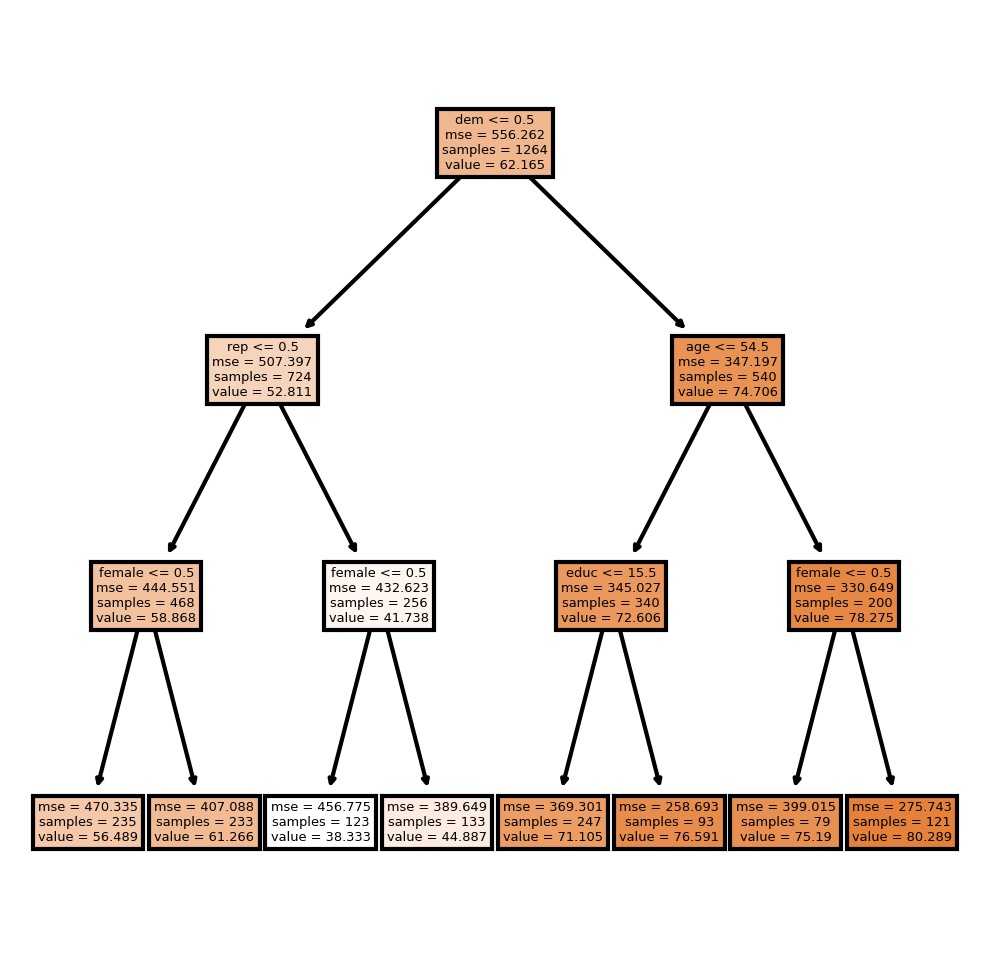

In [4]:
tree = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
fit_tree = tree.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(fit_tree, feature_names = X_covariates, filled = True)

# Interpret the results

The above decision tree shows different combinations of factors that predict the attitude/feelings of warmth/coldness towards President Joe Biden. The outcome variable is 'biden' indicating a feeling thermometer ranging from 0 to 100. The value 0 indicates extreme coldness and 100 indicates extreme warmth. For ease of interpretation, let us consider that the value of 'biden'  below or equal to 50 represents a cold attitude towards Biden, while the value above 50 represents warm attitude towards Biden. 

Looking at the bottom node, we see that the older (above 54.5 years old) female democrats have the most warmth feeling towards Joe Biden with an average score of 80.289, while non-democrat, republican males have the coldest attitude towards Biden with an average score of 38.33.The rest of the other people except those who are non-democrat, republican males show some moderate level of warm attitude towards Biden. Another interesting result is that the older democrat who has more than 15.5 years of schooling have a higher level of warmth attitude toward Biden than those having less than equal to 15.5 years of schooling.

From the second row of the decision tree, we also see all the groups of people except one group (i.e non-democrat, republican) have a warm feeling/attitude towards Biden.



# Find the MSE

In [5]:
MSE = mean_squared_error(y_test, fit_tree.predict(X_test))
print(MSE)


396.1937146321307


# Task 2

In [6]:
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, 10],
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(2, 20)}

optimal_params = sklearn.model_selection.RandomizedSearchCV(fit_tree, param_dist, n_iter=100,n_jobs=-1,
                 cv=5,random_state=25,scoring='neg_mean_squared_error')

# Report the optimal tuning parameters 

In [7]:
print("Optimal tuning parameter values: %s" % optimal_params.fit(X,y).best_params_)

Optimal tuning parameter values: {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}


# Report the MSE of the optimal results

In [8]:
print("MSE of the optimal results: %s" % optimal_params.fit(X,y).best_score_)

MSE of the optimal results: -401.713307249986


# Task 3

In [9]:
tree_RF = RandomForestRegressor(max_depth=3,n_estimators=100, bootstrap=True,n_jobs=-1,oob_score=True,random_state=25)
tree_RF.fit(X, y)

RandomForestRegressor(max_depth=3, n_jobs=-1, oob_score=True, random_state=25)

In [10]:
y_predict_RF = tree_RF.oob_prediction_
MSE_RF = mean_squared_error(y, y_predict_RF)
print('MSE=', MSE_RF)

MSE= 398.9994554488344


In [11]:
param_dist_RF = {"n_estimators": [10, 200], "max_depth": [3, 10],"min_samples_split": sp_randint(2, 20),
                 "min_samples_leaf": sp_randint(2, 20), "max_features": sp_randint(1, 5)}

optimal_params_RF = sklearn.model_selection.RandomizedSearchCV(tree_RF, param_dist_RF, n_iter=100,
                    n_jobs=-1, cv=5, random_state=25,scoring='neg_mean_squared_error' )

# Report the optimal tuning parameters

In [12]:
print("Optimal tuning parameter values: %s" % optimal_params.fit(X,y).best_params_)

Optimal tuning parameter values: {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}


# Report the MSE of the optimal results

In [13]:
print("MSE of the optimal results: %s" % optimal_params.fit(X,y).best_score_)

MSE of the optimal results: -401.713307249986
